Calculating a cumulative sum is very similar to calculating a sum, except, instead of returning a single value, you return a list of numbers that represents the cumulative sum of the series. 

The output of the algorithm is a vector of the same lenght as the input vector. 

#### Libraries

In [22]:
import numpy as np
import pandas as pd
from numba import jit
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple, Any, NewType

# For code profiling
from utils.profiler import time_this, timed_report
from utils.profiler import ExponentialRange

In [23]:
def random_numeric_list(n: int) -> List[float]:
    return list(np.random.random(n))

#### Slow cumulative sum with hidden complexity.

This code recalculates the sum  of the series up to element *i* at every step on they way.
This algorithm is incurring into unnecesary complexity by repeatedly summing the series for every *i*.

We say that the `sum` function introduces hidden complexity because it is not obvious that an expensive loop is ocurring inside the call to sum. 

In [24]:
@time_this(lambda x: len(x))
def slow_cusum(values: List[float]) -> List[float]:
    """
    This is O(n^2) time, because it computes:
    1
    1 + 2
    1 + 2 + 3
    1 + 2 + 3 + 4
    and so on...
    Leading to n*(n-1)/2 individual additions, whic is O(n^2)
    """
    cumsum = []
    for i in range(len(values)):
        the_sum = sum(values[:i + 1])
        cumsum.append(the_sum)
    
    return cumsum

### Pure-Python cum sum slow implementation

The following code does the exact same thing as the previous one, but it exposes the complexity of the algorithm by explicitly using nested `for` loops. 

The results table at the end shows that the execution speed for these two algorithms is virtually the same. 

In [25]:
@time_this(lambda x: len(x))
def slow_cusum_expanded(values: List[float]) -> List[float]:
    """
    Same as above, O(n^2), but exposes the hidden complecity of sum()
    """
    cumsum = []
    for i in range(len(values)):
        accumulator = 0
        for j in range(i+1):
            accumulator += values[j]
        cumsum.append(accumulator)
    return cumsum

### Python fast implementation

The better version of this algorithm arises from applying a smidgen of creativity to the problem.

We can rewrite the cumulative sum equation as follows:

$$y_i = y_{i-1} + x_i$$

The following code performs only *n* additions.

In [26]:
@time_this(lambda x: len(x))
def python_fast_cusum(values: List[float]) -> List[float]:
    """
    This is O(n) time, because it does n additions for n 
    values
    """
    cusum = []
    accumulator = 0

    for value in values:
        accumulator += value
        cusum.append(accumulator)

    return cusum

### Pandas and Numpy implementations

In [27]:
@time_this(lambda x: len(x))
def pandas_fast_cusum(values: pd.Series) -> pd.Series:
    """
    This is O(n) and optimized with C code
    """
    return values.cumsum()

In [28]:
@time_this(lambda x: len(x))
def np_fast_cusum(values: np.ndarray) -> np.ndarray:
    """
    This is O(n) and optimized with C code
    """
    return values.cumsum()

### Numba implementations

In [29]:
@jit(nopython=True)
def _numba_fast_cusum(values: np.ndarray) -> np.ndarray:
    """
    This is O(n) time and just-in-time compiled with numba
    """
    cusum = np.zeros(values.shape[0])
    accumulator = 0

    for index, value in enumerate(values):
        accumulator += value
        cusum[index] = accumulator

    return cusum

# Get numba to run the jit optimization
_numba_fast_cusum(np.array(random_numeric_list(10000)))

# Register time-able version of function
@time_this(lambda x: len(x))
def numba_fast_cusum(values: np.ndarray) -> np.ndarray:
    return _numba_fast_cusum(values)

### Execution times

slow_cusum
    n   = 1 values
    t   = 22.704 ms
    n/t = 0.044 values per ms

slow_cusum
    n   = 3 values
    t   = 0.008 ms
    n/t = 375.0 values per ms

slow_cusum
    n   = 5 values
    t   = 0.011 ms
    n/t = 467.2897 values per ms

slow_cusum
    n   = 10 values
    t   = 0.013 ms
    n/t = 769.2308 values per ms

slow_cusum
    n   = 17 values
    t   = 0.061 ms
    n/t = 280.0659 values per ms

slow_cusum
    n   = 31 values
    t   = 0.096 ms
    n/t = 322.5806 values per ms

slow_cusum
    n   = 56 values
    t   = 0.261 ms
    n/t = 214.3951 values per ms

slow_cusum
    n   = 100 values
    t   = 0.799 ms
    n/t = 125.1251 values per ms

slow_cusum
    n   = 177 values
    t   = 2.046 ms
    n/t = 86.5314 values per ms

slow_cusum
    n   = 316 values
    t   = 5.301 ms
    n/t = 59.6159 values per ms

slow_cusum
    n   = 562 values
    t   = 15.799 ms
    n/t = 35.5716 values per ms

slow_cusum
    n   = 1000 values
    t   = 44.83 ms
    n/t = 22.3064 values per m

pandas_fast_cusum
    n   = 3162277 values
    t   = 38.298 ms
    n/t = 82569.6441 values per ms

pandas_fast_cusum
    n   = 5623413 values
    t   = 60.406 ms
    n/t = 93093.4624 values per ms

pandas_fast_cusum
    n   = 10000000 values
    t   = 106.331 ms
    n/t = 94046.3931 values per ms

pandas_fast_cusum
    n   = 17782794 values
    t   = 177.108 ms
    n/t = 100406.2143 values per ms

pandas_fast_cusum
    n   = 31622776 values
    t   = 309.376 ms
    n/t = 102214.8353 values per ms

pandas_fast_cusum
    n   = 56234132 values
    t   = 635.682 ms
    n/t = 88462.6779 values per ms

pandas_fast_cusum
    n   = 100000000 values
    t   = 989.372 ms
    n/t = 101074.2066 values per ms

numba_fast_cusum
    n   = 1 values
    t   = 123.129 ms
    n/t = 0.0081 values per ms

numba_fast_cusum
    n   = 3 values
    t   = 0.006 ms
    n/t = 468.75 values per ms

numba_fast_cusum
    n   = 5 values
    t   = 0.012 ms
    n/t = 416.6667 values per ms

numba_fast_cusum
    n   = 1

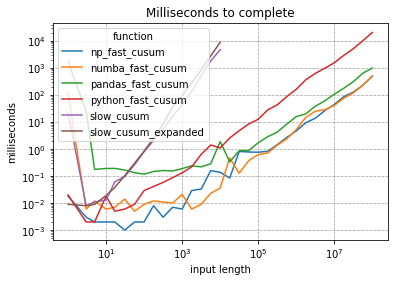

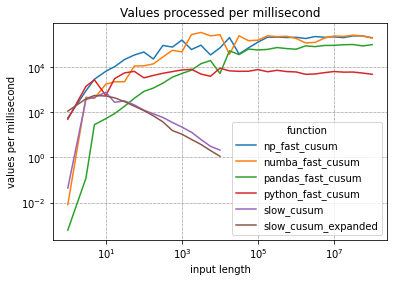

In [30]:
if __name__ == '__main__':

    exp_range = ExponentialRange(0, 8, 1/4)
    values = random_numeric_list(exp_range.max)

    with timed_report():
        for i in exp_range.iterator(4):
            slow_cusum(values[:i])

        for i in exp_range.iterator(4):
            slow_cusum_expanded(values[:i])

        for i in exp_range.iterator():
            python_fast_cusum(values[:i])

        for i in exp_range.iterator():
            pandas_fast_cusum(pd.Series(values[:i]))
        
        for i in exp_range.iterator():
            numba_fast_cusum(np.array(values[:i]))

        for i in exp_range.iterator():
            np_fast_cusum(np.array(values[:i]))